# MATH BEHIND PERCEPTRON AND IMPLEMENTATION WITH PYTHON CODE

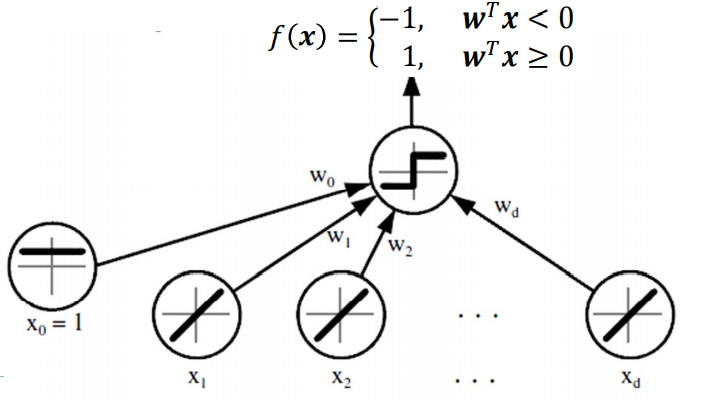

In [2]:
Image("images/perceptron.png",width=500)

### only misclassified training samples affect discriminant function . There are 3 possible outcome

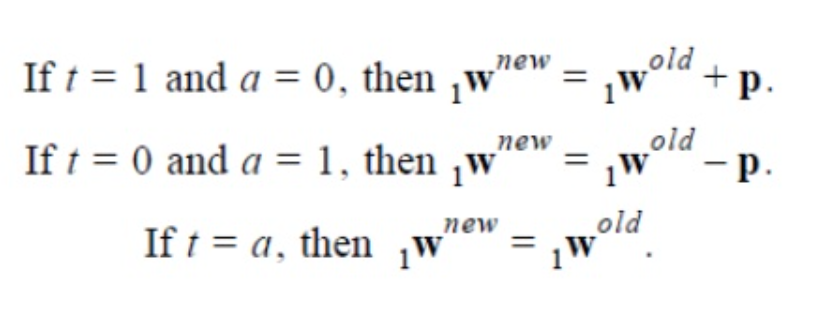

In [42]:
Image("images/perceptron_3.png",width=500)

### p = learning_rate * (expected - predicted) * x    
### x = input value

In [6]:
from IPython.display import Image
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=2, n_features=2, cluster_std=2, random_state=22, center_box=(20, 35))

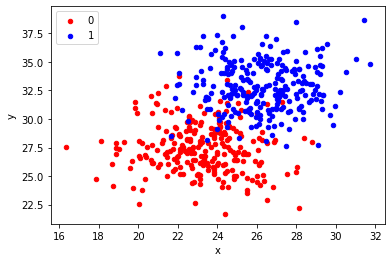

In [8]:
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [9]:
min_x = X[:,0].min()
max_x = X[:,0].max()
min_y = X[:,1].min()
max_y = X[:,1].max()

In [43]:
# Calculate if we predicted correct label or wrong label. If it is wrong we need to update our weights. 
# weights -= learning_rate * error * (np.append(inputs,1))
# After each epoch we will decrease learning rate a bit in order to avoid high jump when it close to convergence.
# After each epoch we will plot the accuracy and current desicion boundary to keep track of increase in accuracy.
# The boundary line comes from below equation :
# w0*x0 + w1*x1 + b = 0
# => w1*x1 = -wo*x0 - b
# => x1 = -w0/w1 * x0 - b/w1
# we will set early_stopping -- Algorithm will run until accuracy doesn't improve for early_stopping epoch.

In [46]:
def pctrn(X, y, learning_rate, num_epocs, early_stopping):

    weights =[0.5]*(np.unique(y).size+1)
    summation = 0
    threshold = 0
    accuracy = 0
    plot_data = pd.DataFrame([])
    max_accuracy = 0
    error_going_up = 0
    best_epoch = 0 

   
    for epoch in range(num_epocs):
        total_error=0
        for inputs, label in zip(X, y):
            summation = np.dot(weights,np.append(inputs,1))
            if summation > threshold :
                prediction = 1
            else:
                prediction = 0
            
            error =  prediction- label

            total_error += abs(error)
               
            weights -= learning_rate * error * (np.append(inputs,1))
        
        learning_rate -= 0.001
        accuracy = ((len(y)-total_error)/len(y))
           
        plot_data = plot_data.append(pd.DataFrame({'Epoch':epoch, 'Accuracy':accuracy,'Weights_0':weights[0],
                                              'Weights_1':weights[1],'Weights_2':weights[2]}, index=[0]),ignore_index=True)

        
        if epoch%50==1:
            r = np.array(range(-10,55))
            y_perceptron = (-1)*(weights[0]/weights[1])*r-weights[2]/weights[1]
            # scatter plot, dots colored by class value
            plt.scatter(x=df.x,y=df.y,c=df.label)
            plt.xlim([min_x,max_x])
            plt.ylim([min_y,max_y])
            plt.title("Epoch : %.0f"%epoch)
            style = "b-" if epoch > 0 else "r--"
            plt.plot(r,y_perceptron,style)
            print(accuracy)
            plt.show()
            plot_data.plot.line(x='Epoch', y='Accuracy')
            plt.show()
                   
        
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            error_going_up = 0
            best_epoch = epoch
        
        else:
            error_going_up += 1
            if error_going_up == early_stopping:
                best_epoch = epoch-early_stopping
                break # early stopping    
                
       
        
    # we will print best epoch graph
    r = np.array(range(-10,55))
    y_perceptron = (-1)*(plot_data.query("Epoch == @best_epoch").Weights_0.values/plot_data.query("Epoch == @best_epoch").Weights_1.values)*r-plot_data.query("Epoch == @best_epoch").Weights_2.values/plot_data.query("Epoch == @best_epoch").Weights_1.values
    # scatter plot, dots colored by class value
    plt.scatter(x=df.x,y=df.y,c=df.label)
    plt.xlim([min_x,max_x])
    plt.ylim([min_y,max_y])
    style = "b-" if epoch > 0 else "r--"
    plt.plot(r,y_perceptron,style)
    print("Best Epoch %.0f" %best_epoch )
    print(plot_data[plot_data['Epoch']==best_epoch].Accuracy.values)
    plt.show()

0.536


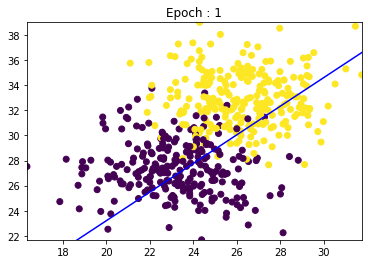

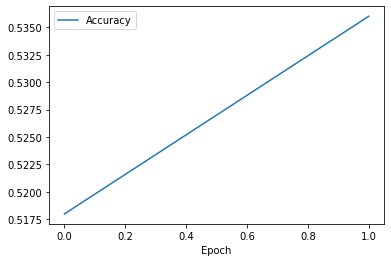

0.57


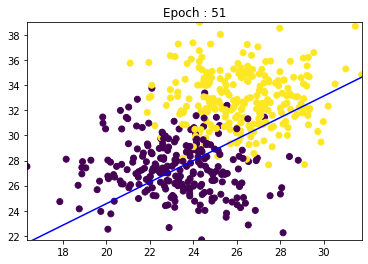

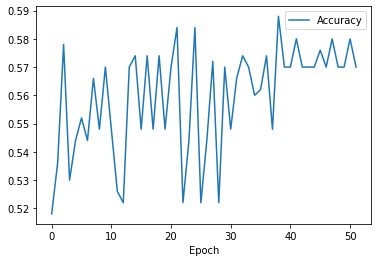

0.576


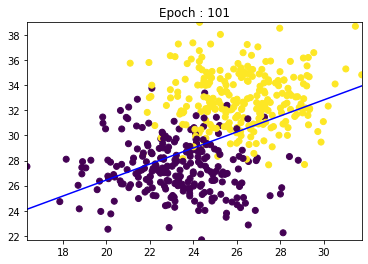

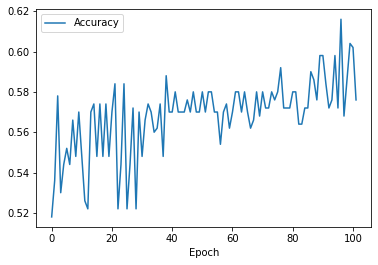

0.618


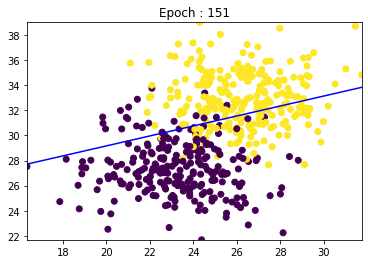

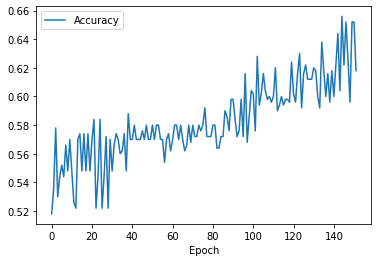

0.67


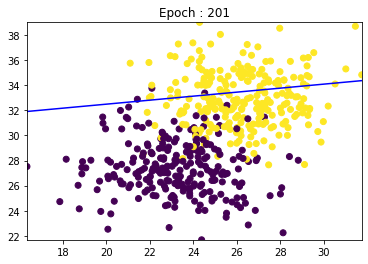

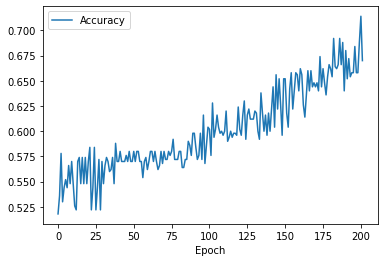

0.68


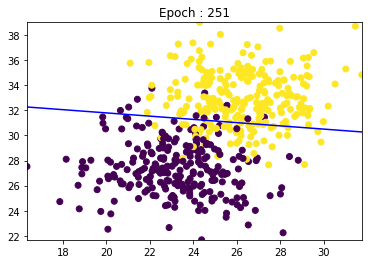

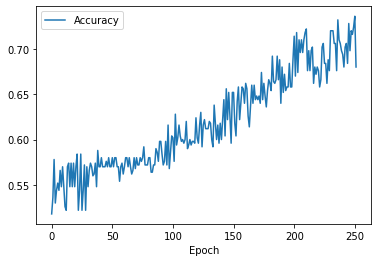

0.78


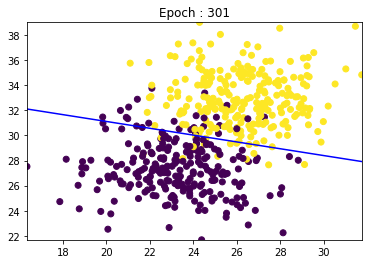

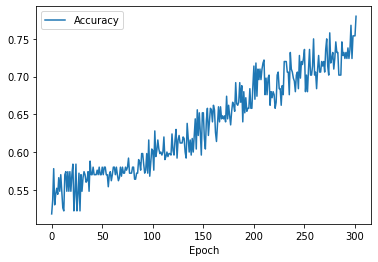

0.756


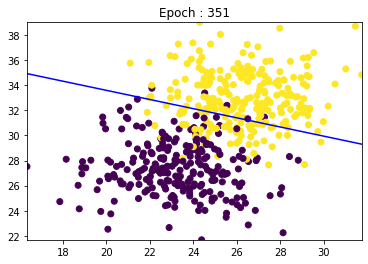

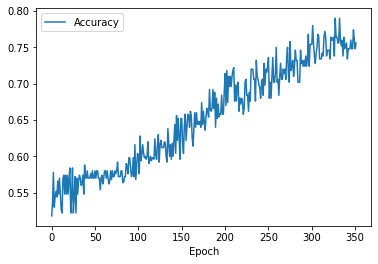

0.778


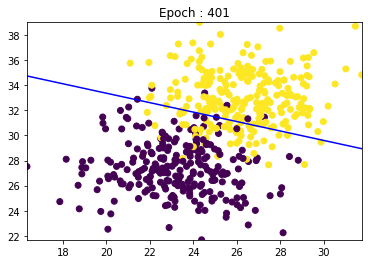

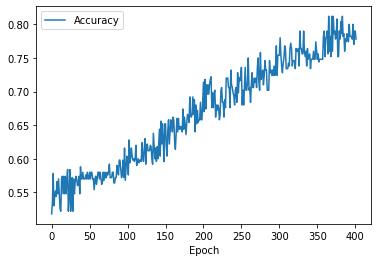

Best Epoch 365
[0.812]


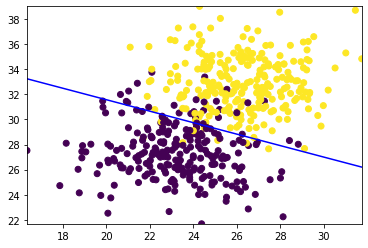

In [47]:
pctrn(X,y,learning_rate=0.8,num_epocs=800,early_stopping=50)

### On epoch 365 we reach to the maximum accuracy which is %81 and accuracy doesn't improve for 50 epochs. You can see how early our perceptron converges and find nearly optimum solution